## Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
import seaborn as sns
import pandas as pd

## Overfitting: Model learnss noise and performs well on training data but poorly on unseen data.
## Underfitting: Model is too simple and performs poorly on both training and testing data.

In [6]:

X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


simple_model = LogisticRegression(max_iter=100)
simple_model.fit(X_train, y_train)


print("Training score (Simple Model):", simple_model.score(X_train, y_train))
print("Test score (Simple Model):", simple_model.score(X_test, y_test))


complex_model = LogisticRegression(C=1e6, max_iter=100)
complex_model.fit(X_train, y_train)

print("Training score (Complex Model):", complex_model.score(X_train, y_train))
print("Test score (Complex Model):", complex_model.score(X_test, y_test))

Training score (Simple Model): 0.86
Test score (Simple Model): 0.82
Training score (Complex Model): 0.8542857142857143
Test score (Complex Model): 0.8266666666666667


## Learning curves show how training and validation scores evolve with training set size.

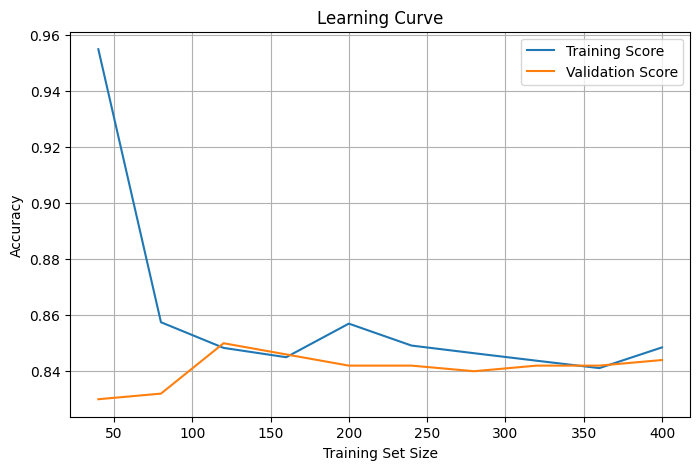

In [7]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(max_iter=1000), 
    X=X, y=y, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, 
    scoring='accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


## A confusion matrix summarizes prediction results: TP, FP, TN, FN.


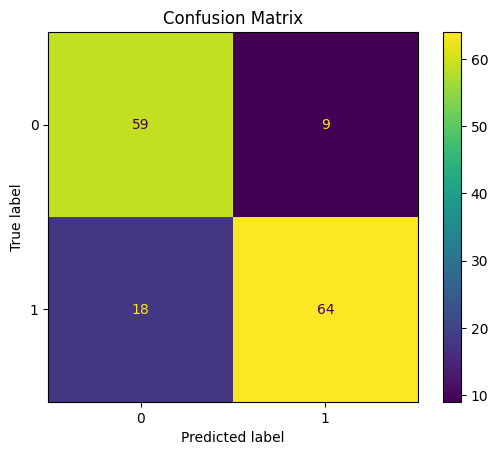

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81        68
           1       0.88      0.78      0.83        82

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.83      0.82      0.82       150



In [8]:

y_pred = simple_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))


# ROC curve shows the trade-off between sensitivity (TPR) and specificity (FPR).
# AUC (Area Under Curve) summarizes performance across all thresholds.

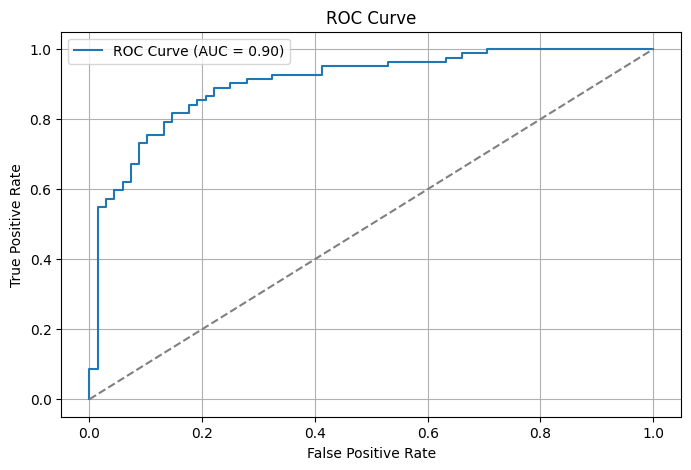

In [9]:
y_proba = simple_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

## Bias: Systematic error where model favors a particular outcome.
## Reliability: Stability and reproducibility of model predictions.

In [10]:
np.random.seed(42)
gender = np.random.choice(['male', 'female'], size=len(y_test))

results_df = pd.DataFrame({'gender': gender, 'true': y_test, 'pred': y_pred})
grouped = results_df.groupby('gender').apply(lambda x: (x['pred'] == x['true']).mean())
print("Accuracy by gender:")
print(grouped)

scores = []
for seed in range(10):
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.3, random_state=seed)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_, y_train_)
    scores.append(model.score(X_test_, y_test_))

print(f"Mean accuracy over 10 runss: {np.mean(scores):.3f}")
print(f"Standaard deviation: {np.std(scores):.3f}")

Accuracy by gender:
gender
female    0.804878
male      0.838235
dtype: float64
Mean accuracy over 10 runss: 0.837
Standaard deviation: 0.027


/tmp/ipykernel_14807/3077427379.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = results_df.groupby('gender').apply(lambda x: (x['pred'] == x['true']).mean())
